1. Baseline Performance
* Download Data

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-09-07 12:14:20--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.207, 172.217.212.207, 74.125.124.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   188MB/s    in 0.3s    

2023-09-07 12:14:20 (188 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



* Extract Archieve
* Assign Training and validation set directories

1. Os Libarary -->  Miscellaneous operating system interfaces
2. The ZIP file format is a common archive and compression standard. This module provides tools to create, read, write, append, and list a ZIP file.

In [2]:
import os
import zipfile
#1. Extract Archieve
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()
#_-----------------------------------------------------------------
#2. Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

* Directory with cats training pictures
* Directory with dogs training pictures

In [3]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

* Directory with cats vaildation pictures
* Directory with dogs vaildation pictures

In [4]:
vaildation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

3. Build Model

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(tf.keras.layers.Conv2D(filters=32 ,kernel_size=(3,3),name="Layer_1",activation='relu',input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',name="Layer_2"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3,),activation='relu',name="Layer_3"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3,),activation='relu',name="Layer_4"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512,activation='relu',name="Layer_5"))
model.add(tf.keras.layers.Dense(units =1 , activation='sigmoid',name="Layer_6"))
model.compile(loss = 'binary_crossentropy',optimizer=RMSprop(learning_rate=1e-4),metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Conv2D)            (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 Layer_2 (Conv2D)            (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 Layer_3 (Conv2D)            (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

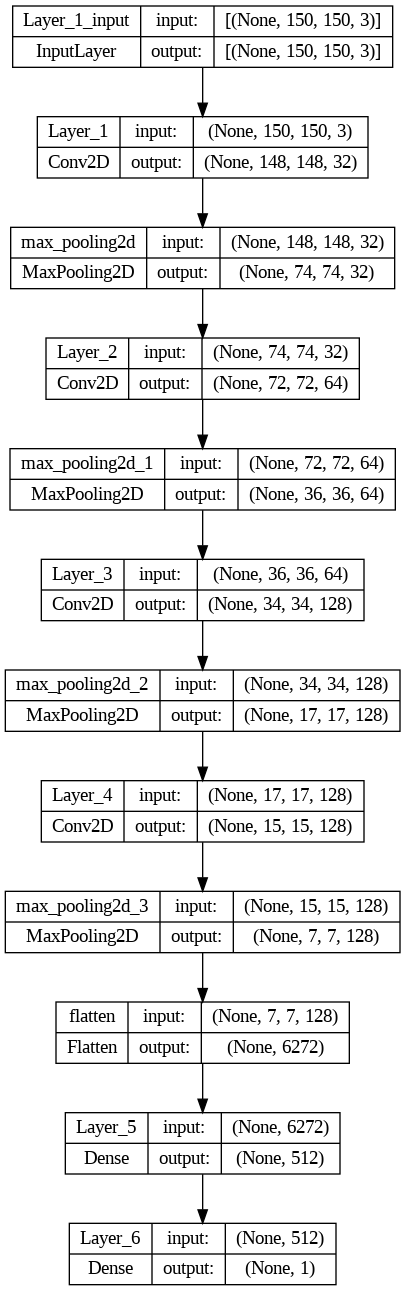

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes =True, show_layer_names = True)

4. Using Image Generator

* يتم استخدام --> ImageDataGenerator
* لزيادة كمية الصور التي سوف يتم عليها التدريب او الاختبار وهذا بسبب عدم وجود داتا كافية وهذا يعتبر من ضمن مفهوم
* Data_Agumentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

* **Flow training images in batches of 20 using train_datagen generator**
1. Train_dir --> This is the source directory for training images
2. Target_size --> All images will be resized to 150x150
3. batch_size --> Since we use binary_crossentropy loss, we need binary labels


In [9]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.


*  Flow validation images in batches of 20 using test_datagen generator

In [10]:
vaildation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


5. Training Model
* Step_per_epoch = 100 --> batch_size * # of epochs --> 2000 Images
* validation_steps = 50 --> batch_szie * # of epochs --> 1000 images

In Keras, the term `"verbose"` refers to a parameter that controls the amount of information displayed during the training process.

In [11]:
EPOCHS = 20 # Detect Constant Number Of Epoches
history = model.fit(train_generator,steps_per_epoch=100,epochs=EPOCHS ,validation_data= vaildation_generator , validation_steps=50,verbose=2)

Epoch 1/20
100/100 - 132s - loss: 0.6902 - accuracy: 0.5270 - val_loss: 0.6796 - val_accuracy: 0.6360 - 132s/epoch - 1s/step
Epoch 2/20
100/100 - 131s - loss: 0.6716 - accuracy: 0.5825 - val_loss: 0.6446 - val_accuracy: 0.6430 - 131s/epoch - 1s/step
Epoch 3/20
100/100 - 117s - loss: 0.6404 - accuracy: 0.6235 - val_loss: 0.6122 - val_accuracy: 0.6920 - 117s/epoch - 1s/step
Epoch 4/20
100/100 - 124s - loss: 0.5967 - accuracy: 0.6790 - val_loss: 0.5814 - val_accuracy: 0.7080 - 124s/epoch - 1s/step
Epoch 5/20
100/100 - 118s - loss: 0.5666 - accuracy: 0.6955 - val_loss: 0.6145 - val_accuracy: 0.6600 - 118s/epoch - 1s/step
Epoch 6/20
100/100 - 125s - loss: 0.5458 - accuracy: 0.7140 - val_loss: 0.5661 - val_accuracy: 0.7030 - 125s/epoch - 1s/step
Epoch 7/20
100/100 - 118s - loss: 0.5358 - accuracy: 0.7265 - val_loss: 0.5566 - val_accuracy: 0.7080 - 118s/epoch - 1s/step
Epoch 8/20
100/100 - 119s - loss: 0.5121 - accuracy: 0.7440 - val_loss: 0.5658 - val_accuracy: 0.6950 - 119s/epoch - 1s/step


* `'''Plots the training and validation loss and accuracy from a history object'''`


In [19]:
import matplotlib.pyplot as plt
#create function to make visualization for data
def plot_loss_acc(history):
  plt.style.use('ggplot')
  acc= history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  plt.plot(epochs,acc,'bo',alpha = 0.7 , color = 'green' ,label ='Training Accuracy')
  plt.plot(epochs,val_accuracy,'b',alpha = 0.7 , color = 'red' , label ='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs,loss,'bo',alpha = 0.7,color = 'blue',label = 'Training Loss')
  plt.plot(epochs,val_loss,'b',alpha = 0.7,color = 'red' ,label = 'Validation Loss')
  plt.title('Training & Validation Loss')
  plt.legend()
  plt.show()

* **Plot training results**


<ipython-input-19-0f67fa52b116>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs,acc,'bo',alpha = 0.7 , color = 'green' ,label ='Training Accuracy')
<ipython-input-19-0f67fa52b116>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs,val_accuracy,'b',alpha = 0.7 , color = 'red' , label ='Validation Accuracy')
<ipython-input-19-0f67fa52b116>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs,loss,'bo',alpha = 0.7,color = 'blue',label = 'Training Loss')
<ipython-input-19-0f67fa52b116>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.

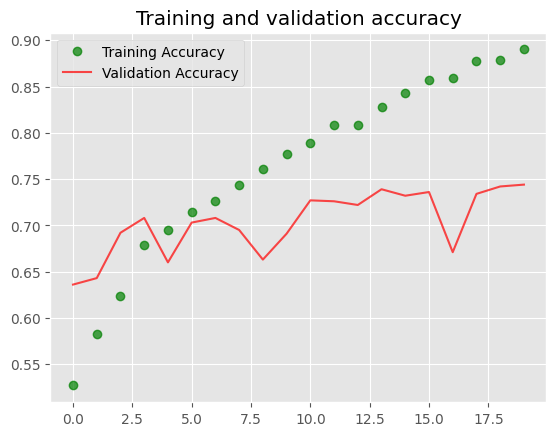

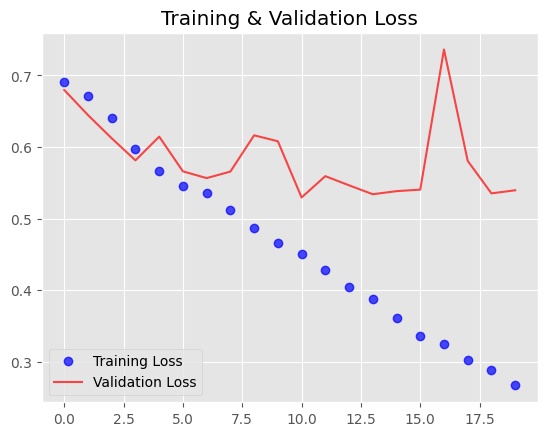

In [20]:
plot_loss_acc(history)